# Data Exploration
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---
## Summary

An exploration of the data similar to the original `data_exploration.ipynb`, but solely focused on our modified version.

---

## Setup

### Necessary Imports

In [25]:
from itertools import chain
from nltk import FreqDist
from nltk.corpus import words

import emoji
import nltk
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Settings

In [26]:
# Turn this off
%pprint
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

Pretty printing has been turned ON


### Globals

In [27]:
DATAPATH = "../data/"
DATA = "final-splits.csv"
IMAGES = ""
SEED = 42

### Functions

In [28]:
def load_dataset() -> pd.DataFrame:
    return pd.read_csv(DATAPATH + DATA)


def countplot(df: pd.DataFrame, x: str, labels: bool = False) -> plt.axes:

    name = x.replace('_', ' ').title()
    ordering = df[x].value_counts().index

    plot = sns.countplot(data=df, x=x, hue=x, stat="percent", 
                         order=ordering, hue_order=ordering)

    if labels:
        for i in plot.containers:
            plot.bar_label(i)

    plot.tick_params(axis="x", rotation=90)
    plot.set_title(f"{name} Percentages")
    plot.set_ylabel("Percentage")
    plot.set_xlabel(name)

    return plot

---

## Glimpse

In [29]:
df = load_dataset()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   painting   19000 non-null  object 
 1   artist     19000 non-null  object 
 2   art_style  19000 non-null  object 
 3   year       11221 non-null  float64
 4   utterance  19000 non-null  object 
 5   emotion    19000 non-null  object 
 6   len        19000 non-null  int64  
 7   factor     19000 non-null  float64
 8   split      19000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [30]:
# Remove test splits
df = df[df['split'] != "TEST"]
df.sample(10)

,painting,artist,art_style,year,utterance,emotion,len,factor,split
6103,konstantin-makovsky_strolling-musicians,konstantin-makovsky,Romanticism,NaN,the man proudly plays his bagpipes as he march...,awe,13,1.0,TRAIN
12652,mstislav-dobuzhinsky_kaunas-1933,mstislav-dobuzhinsky,Symbolism,1933.0,there's something a bit depressing about this ...,something else,29,1.0,TRAIN
12046,rembrandt_view-of-diemen-1655,rembrandt,Baroque,1655.0,the details of this sketch really shows. the a...,contentment,23,2.5,TRAIN
11299,henri-edmond-cross_la-dogana,henri-edmond-cross,Post_Impressionism,NaN,simple painting of a seaside scene with boats.,excitement-amusement,9,1.0,TRAIN
5011,thomas-eakins_in-grandmothers-time-1876,thomas-eakins,Realism,1876.0,the woman is busying making some wool from the...,contentment,12,2.5,TRAIN
6905,salvador-dali_untitled-after-the-night-by-mich...,salvador-dali,Expressionism,NaN,it looks like a god resting in a cloud,awe,9,1.0,TRAIN
14605,gustave-courbet_the-draughts-players-1844,gustave-courbet,Romanticism,1844.0,the figures look playful and friendly in the w...,excitement-amusement,16,1.0,TRAIN
16657,arkhip-kuindzhi_after-the-thunderstorm-1879,arkhip-kuindzhi,Impressionism,1879.0,a peaceful image of the horizon. it makes me f...,contentment,19,2.5,TRAIN
14226,raphael_the-death-of-ananias-cartoon-for-the-s...,raphael,High_Renaissance,NaN,the older men are on the step calling out the ...,fear,40,1.0,TRAIN
13259,marc-chagall_a-flowered-easel-1984,marc-chagall,Naive_Art_Primitivism,1984.0,i think the man painting the picture is nice b...,something else,22,1.0,TRAIN


In [31]:
df[df.painting == "marc-chagall_noah-s-ark-1966"].utterance.to_list()

['the dark blue and dark green colors make this painting look ominous, especially since there are so many bodies that are contorted at the right hand side']

---

## Feature Distributions

<Axes: title={'center': 'Art Style Percentages'}, xlabel='Art Style', ylabel='Percentage'>

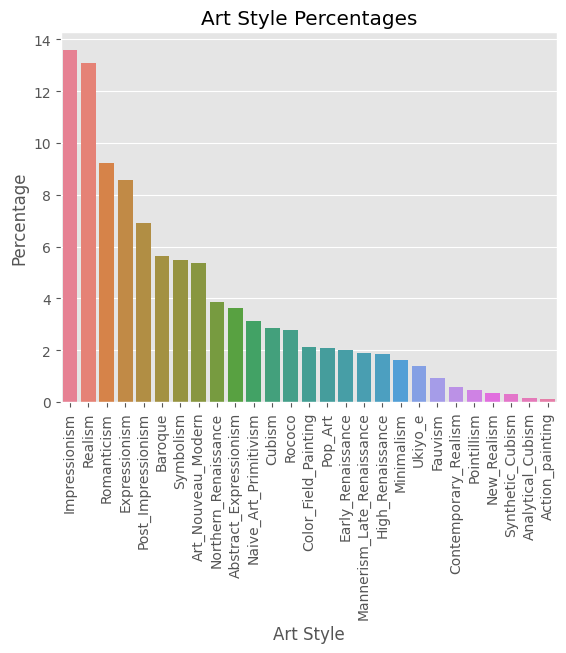

In [32]:
countplot(df, 'art_style')

<Axes: title={'center': 'Emotion Percentages'}, xlabel='Emotion', ylabel='Percentage'>

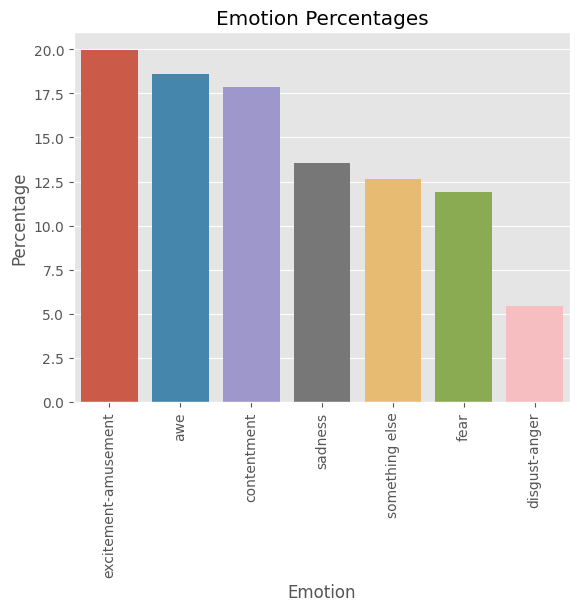

In [33]:
countplot(df, 'emotion') 

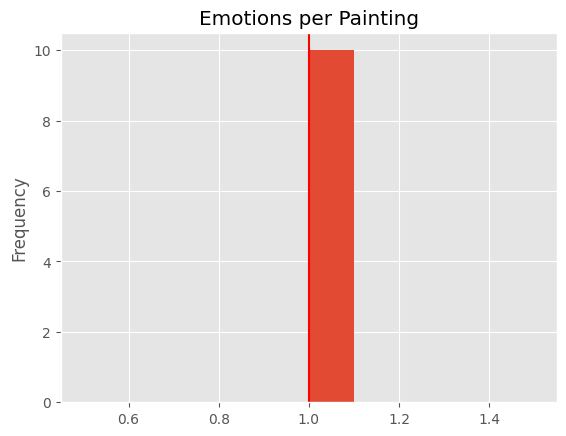

In [34]:
# Sanity check
df.groupby(["painting"])['emotion'].unique().map(len).plot(kind="hist", density=1, title="Emotions per Painting")
plt.axvline(x=df.groupby(["painting"])['emotion'].unique().apply(len).median(), color = "red")

<Axes: xlabel='artist'>

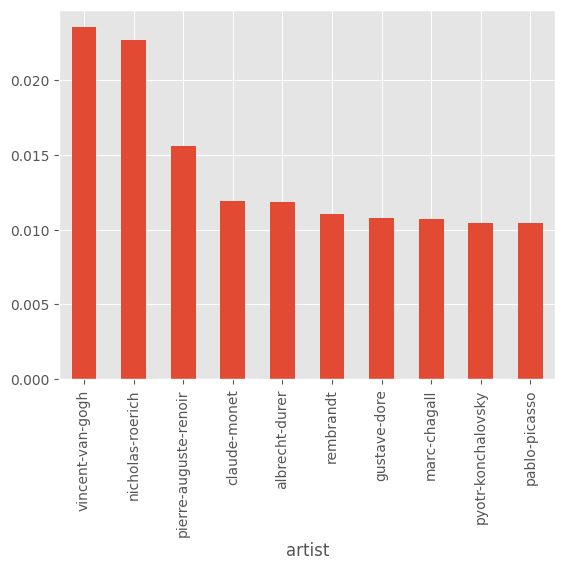

In [35]:
# Popular artists
df.artist.value_counts(normalize=True).nlargest(10, keep="all").plot(kind="bar")

---
## Exploration of the Token Distribution

In [36]:
df['tokens'] = df['utterance'].map(nltk.word_tokenize)

In [37]:
# TTR
types = len(set(chain(*df.tokens.to_list())))
tokens = len(list(chain(*df.tokens.to_list())))
ttr = types / tokens
print(types, tokens, ttr)

12251 285788 0.04286744020042829


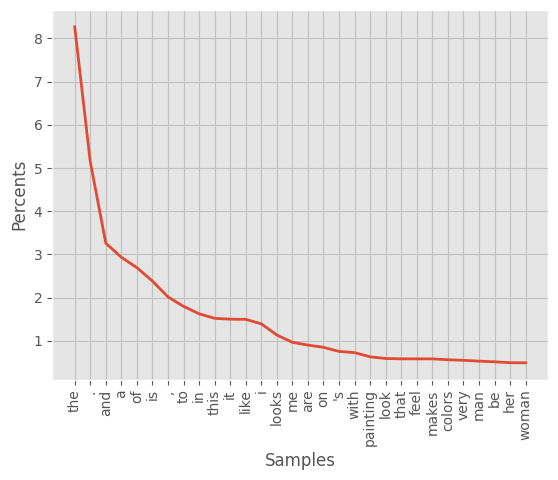

<Axes: xlabel='Samples', ylabel='Percents'>

In [38]:
tok_fq = FreqDist(list(chain(*df["tokens"].to_list())))
tok_fq.plot(30, percents=True)

In [39]:
len(tok_fq.hapaxes())

5908

In [40]:
tok_fq.hapaxes()[:25]

['misshappen',
 'sliding',
 'fingertip',
 'suggestive',
 'intersects',
 'catalogue',
 'smiled',
 'illitration',
 'art/painting',
 'ascending',
 '80s',
 'pciture',
 'stupid.it',
 'on.very',
 'tacky.ugly',
 'exited',
 'sphere',
 'slighly',
 'wringing',
 'sunlit',
 'snack',
 'saturday',
 'greiving',
 'subservience',
 'ostentatious']